In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('ROTATION.csv',header=None)
print(data.shape)
data=data.dropna()
print(data.shape)

(71115, 33)
(71112, 33)


In [2]:
shape=data.shape
N=shape[0]-1

X = np.zeros((N,13,1))
Ls = np.zeros((N,3,1))


Y = np.zeros((N,13))
LPF = np.zeros((N,1))

for ii in range(0,N):
    q1 = int(data.iloc[ii,0])
    q2 = int(data.iloc[ii,1])
    q3 = int(data.iloc[ii,2])
    
    l1 = data.iloc[ii,3]
    l2 = data.iloc[ii,4]
    l3 = data.iloc[ii,5]

    
    
    
    X[ii,q1,0] = 1
    X[ii,q2,0] = 1
    X[ii,q3,0] = 1
    
    Ls[ii,0,0]=l1*0.01
    Ls[ii,1,0]=l2*0.01
    Ls[ii,2,0]=l3*0.01
    
    Y[ii,:] = data.iloc[ii][[8,10,12,14,16,18,20,22,24,26,28,30,32]]
    LPF[ii,0]= data.iloc[ii][6]

    
xticks=[0,1,2,3,4,5,6,7,8,9,10,11,12]



    

In [3]:
#print(X[0])
#print(Ls[0])
data.isnull().any()


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
dtype: bool

In [4]:
import keras as krs
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
from keras.utils import plot_model

# define two sets of inputs
inputA = krs.Input(shape=(13,1))
inputB = krs.Input(shape=(3,))

# the first branch operates on the first input
x = Conv1D(128, kernel_size=1, activation="relu")(inputA)
x = Conv1D(64, kernel_size=1, activation="relu")(x)
x = Conv1D(32, kernel_size=1, activation="relu")(x)
x = Conv1D(24, kernel_size=1, activation="relu")(x)
x = Conv1D(13, kernel_size=1, activation="relu")(x)
x = Flatten()(x)
x = Dense(13, activation="relu")(x)
x = krs.Model(inputs=inputA, outputs=x)

print(x.output)

# the second branch opreates on the second input
y = Dense(3, activation="linear")(inputB)
y = krs.Model(inputs=inputB, outputs=y)

print(y.output)

# combine the output of the two branches
combined = krs.layers.concatenate([x.output, y.output])

# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(64, activation="relu")(combined)
z = Dense(32, activation="relu")(z)
z = Dense(24, activation="relu")(z)
z = Dense(13, activation="linear")(z)

# our model will accept the inputs of the two branches and
# then output a single value
model = krs.Model(inputs=[x.input, y.input], outputs=z)


model.compile(loss='mean_squared_error', optimizer=krs.optimizers.adam(clipnorm=1))
history1 = model.fit( [X,Ls[:,:,0]], Y, validation_data=([X,Ls[:,:,0]], Y), epochs=30, batch_size=32, verbose=1)  

 
    
    
plt.figure()
# Plot training & validation loss values
plt.plot(history1.history['loss'],label = 'mlp')
  
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

Using TensorFlow backend.
c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1




Tensor("dense_1/Relu:0", shape=(?, 13), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 3), dtype=float32)



Train on 71111 samples, validate on 71111 samples
Epoch 1/30
71111/71111 [==============================] - 10s 138us/step - loss: 2.5741e-04 - val_loss: 3.1675e-05
Epoch 2/30
71111/71111 [==============================] - 9s 128us/step - loss: 2.7134e-05 - val_loss: 2.1193e-05
Epoch 3/30
71111/71111 [==============================] - 9s 125us/step - loss: 2.0523e-05 - val_loss: 1.9868e-05
Epoch 4/30
71111/71111 [==============================] - 9s 127us/step - loss: 1.6329e-05 - val_loss: 1.4187e-05
Epoch 5/30
71111/71111 [==============================] - 10s 135us/step - loss: 1.3833e-05 - val_loss: 1.5033e-05
Epoch 6/30
71111/71111 [==============================] - 9s 128us/step - loss: 1.2122e-05 - val_loss: 1.0603e-05
Epoch 7/30
71111/71111 [==============================] - 9s 128us/step - loss: 1.1142e-05 - val_loss: 1.0805e-05
Epoch 8/30
71111/71111 [========

<Figure size 640x480 with 1 Axes>

[0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.] [238. 238. 476.]


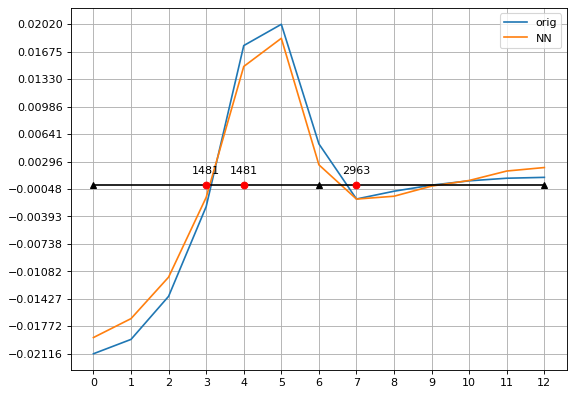

[0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.] [228. 228. 114.]


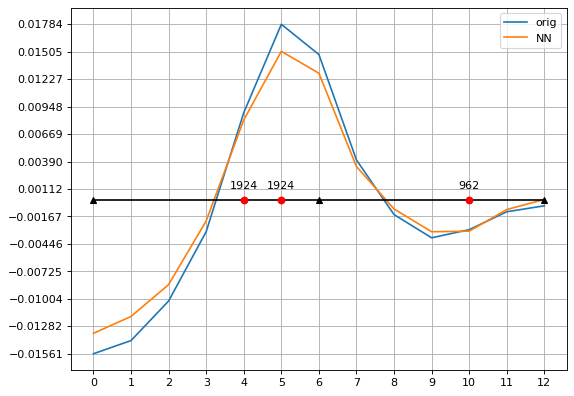

[0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.] [255.  510.  127.5]


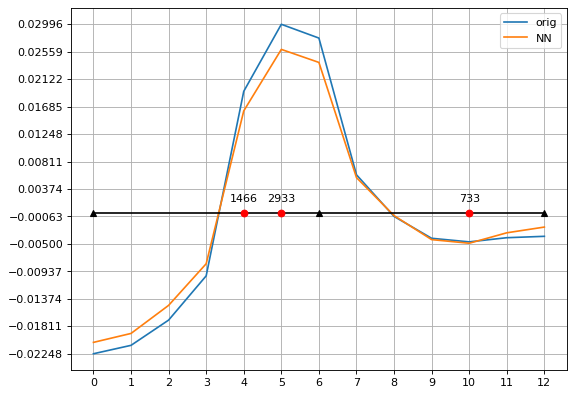

[0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.] [141.   70.5 141. ]


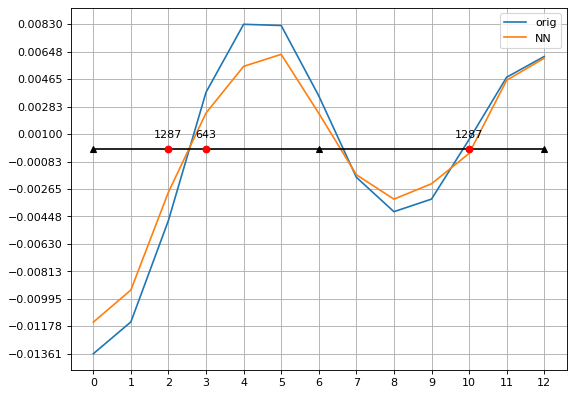

[0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.] [338. 338. 676.]


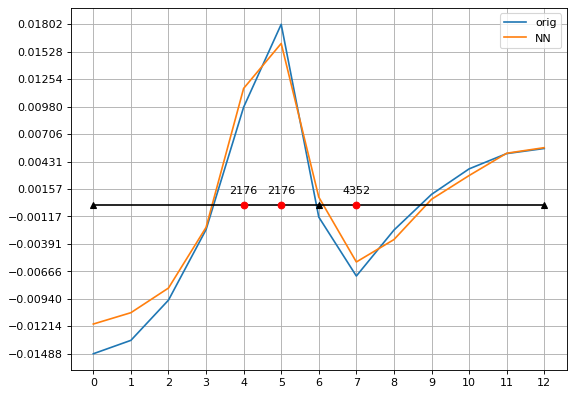

[0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.] [357. 714. 357.]


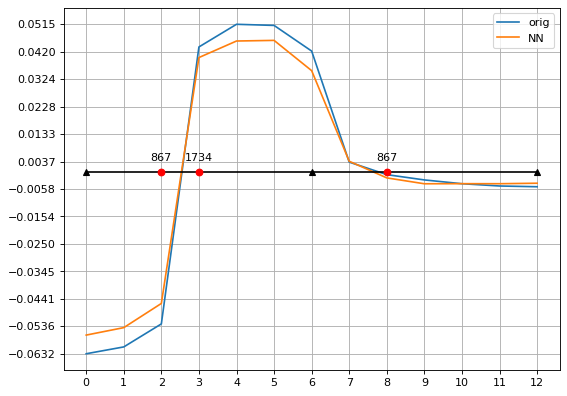

[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] [118. 236. 236.]


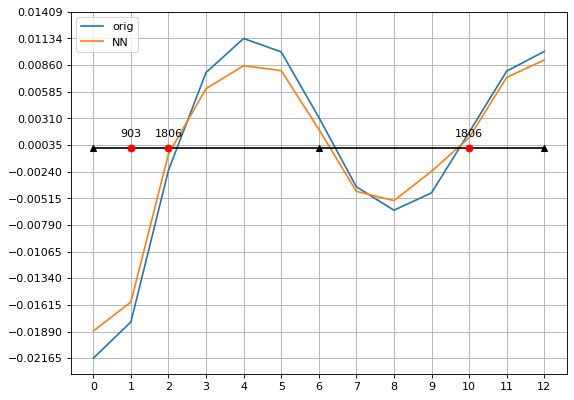

[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] [38. 19. 38.]


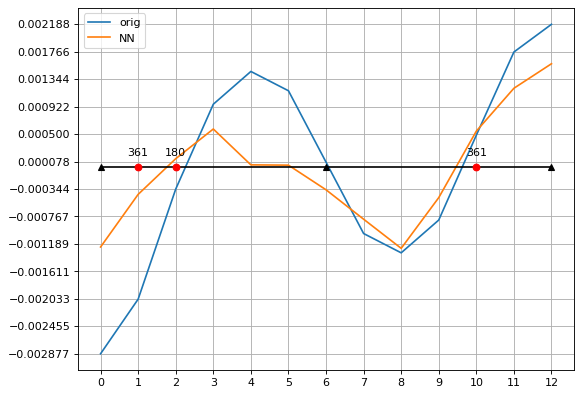

[0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.] [301.  301.  150.5]


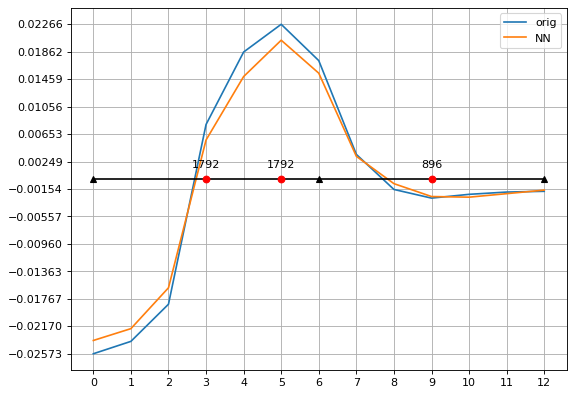

[0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.] [256. 256. 256.]


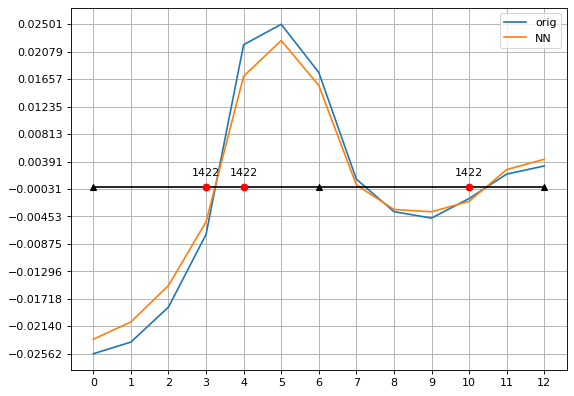

[0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.] [377.  377.  188.5]


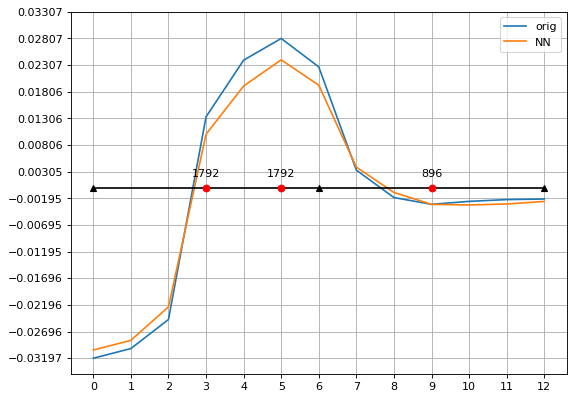

[0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.] [325.  162.5 325. ]


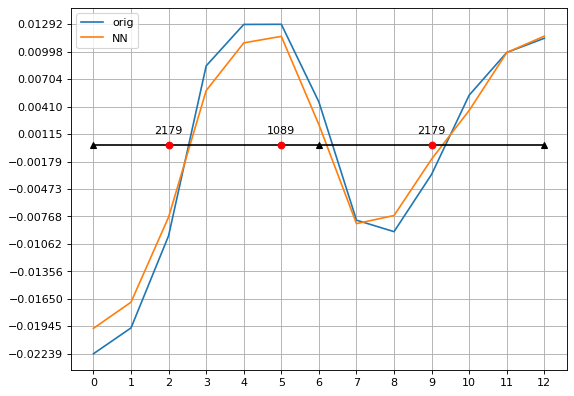

[0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.] [331.  165.5 662. ]


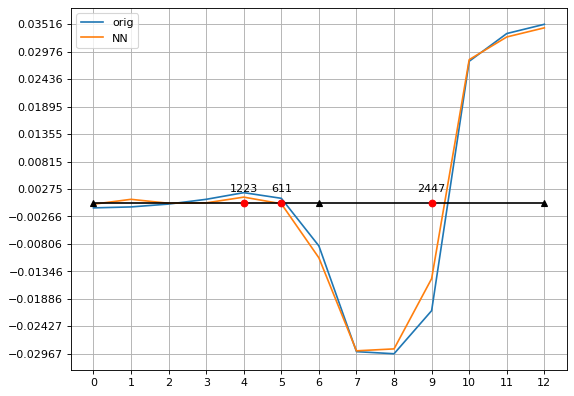

[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.] [174.  87. 348.]


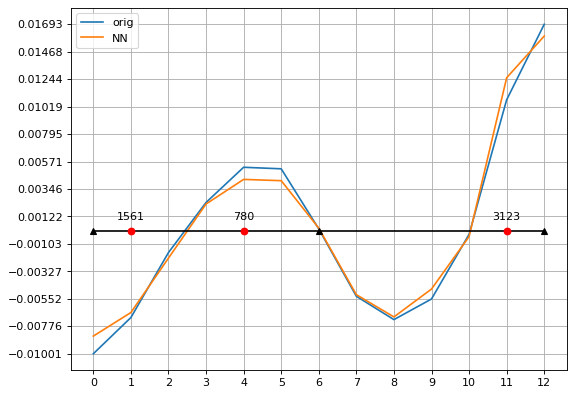

[0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.] [111.  222.   55.5]


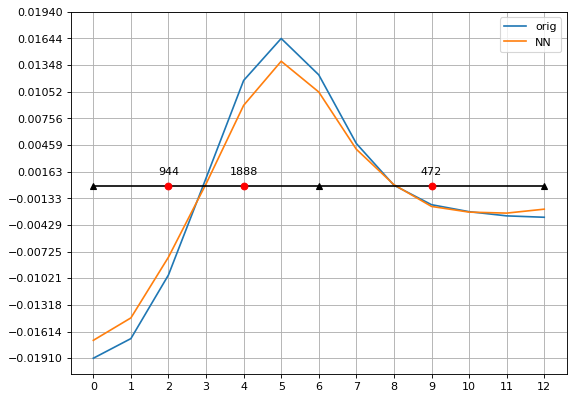

[0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.] [82. 82. 41.]


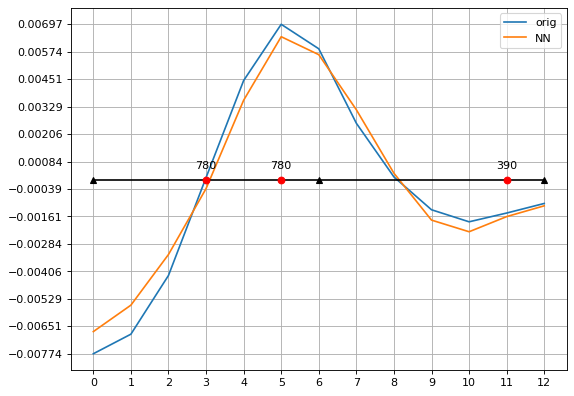

[0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.] [341.  170.5 341. ]


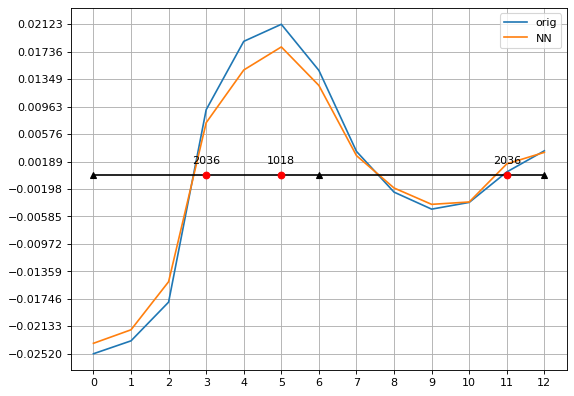

[0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.] [248. 124. 248.]


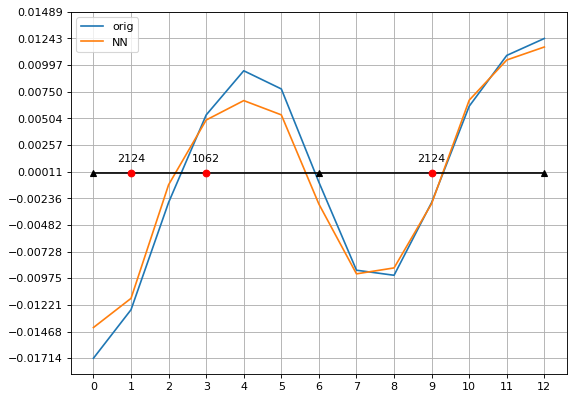

[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.] [ 91.  182.   45.5]


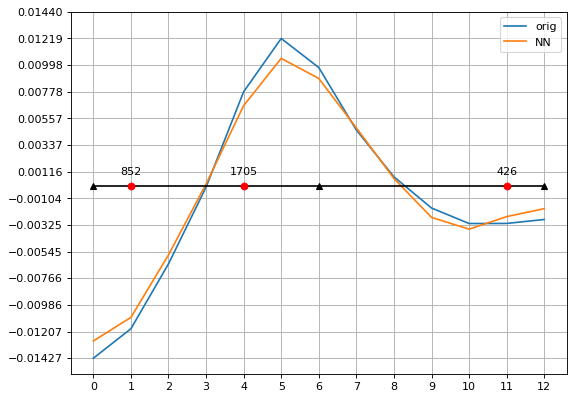

[0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.] [ 94. 188.  94.]


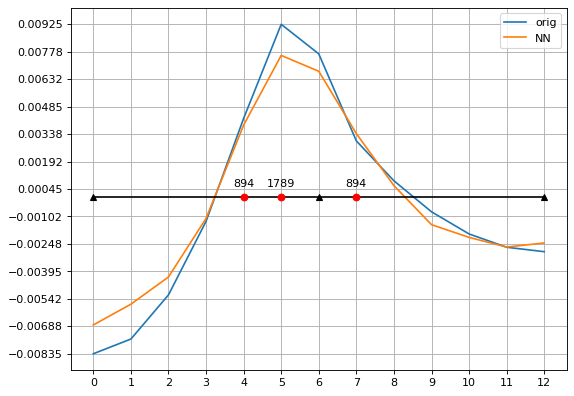

In [5]:
y_pred1 = model.predict([X,Ls[:,:,0]])
import time
from matplotlib.pyplot import figure


for ii in range(20):
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    print(X[ii,:,0],Ls[ii,:,0]*100)
    
    maximo = max([max(y_pred1[ii,:]),max(Y[ii,:])])
    minimo = min([min(y_pred1[ii,:]),min(Y[ii,:])])
        
    plt.plot(Y[ii,:],label='orig')
    plt.plot(y_pred1[ii,:],label='NN')
    #plt.plot(Y[ii,:]-y_pred1[ii,:],label='error')
    
    plt.plot([0,0,0,0,0,0,0,0,0,0,0,0,0],'k-')
    plt.plot([0,6,12],[0,0,0],'^k')
    loads=np.where(X[ii,:,0]==1)[0]
    plt.plot(loads,[0,0,0],'ro')
    
    for i in range(0,3):
        plt.annotate(int(Ls[ii,i,0]*LPF[ii,0]*100), # this is the text
        (loads[i],0), # this is the point to label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        ha='center') # horizontal alignment can be left, right or center

        
    stepd=(maximo-minimo)/12.0
    plt.yticks(np.arange(minimo, maximo +stepd ,step=stepd))
    plt.xticks(xticks)
    plt.legend()
    plt.grid()
    plt.show()
    time.sleep(2) 
    plt.close()

In [6]:

np.set_printoptions(precision=3)



err = np.sum(np.abs(y_pred1-Y)/N,axis=0)
print("errors1\n ", err)





errors1
  [0.003 0.003 0.002 0.001 0.002 0.002 0.002 0.001 0.001 0.001 0.001 0.001
 0.001]


In [57]:
Pos = np.zeros((13,13,1))
Pesos_05 = np.zeros((13,3,1))
Pesos_1 = np.zeros((13,3,1))
Pesos_2 = np.zeros((13,3,1))

for i in range(13):
    Pos[i,2,0] = 1
    Pos[i,4,0] = 1
    Pos[i,9,0] = 1
    Pesos_05[i,0,0] = 30*(i+1)*0.01
    Pesos_05[i,1,0] = 30*(i+1)/2*0.01
    Pesos_05[i,2,0] = 30*(i+1)/2*0.01
    Pesos_1[i,0,0] = 30*(i+1)*0.01
    Pesos_1[i,1,0] = 30*(i+1)*0.01
    Pesos_1[i,2,0] = 30*(i+1)*0.01
    Pesos_2[i,0,0] = 30*(i+1)*0.01
    Pesos_2[i,1,0] = 30*(i+1)*2*0.01
    Pesos_2[i,2,0] = 30*(i+1)*2*0.01
    
    
Inc_SK_05 = model.predict([Pos,Pesos_05[:,:,0]])
Inc_SK_1 = model.predict([Pos,Pesos_1[:,:,0]])
Inc_SK_2 = model.predict([Pos,Pesos_2[:,:,0]])

print(Pesos_1[:,:,0])

[[0.3 0.3 0.3]
 [0.6 0.6 0.6]
 [0.9 0.9 0.9]
 [1.2 1.2 1.2]
 [1.5 1.5 1.5]
 [1.8 1.8 1.8]
 [2.1 2.1 2.1]
 [2.4 2.4 2.4]
 [2.7 2.7 2.7]
 [3.  3.  3. ]
 [3.3 3.3 3.3]
 [3.6 3.6 3.6]
 [3.9 3.9 3.9]]


In [59]:
SK05 =  pd.read_csv('rotation_alpha05_beta05.csv', header=None)
SK1 =  pd.read_csv('rotation_alpha1_beta1.csv', header=None)
SK2 =  pd.read_csv('rotation_alpha2_beta2.csv', header=None)
print(SK1)

def make_graph(_xx,_var,SK):
    sk=[]
    load=[]
    for i in range(0,13):
        load.append(int(SK.iloc[i][3]*SK.iloc[i][6]))
        sk.append(SK.iloc[i][[8,10,12,14,16,18,20,22,24,26,28,30,32]])
    



    figure(num=None, figsize=(20, 12), dpi=80, facecolor='w', edgecolor='k')
    maxes=[]
    mins=[]
    for i in range(0,13):
        maxes.append(max(max(_var[i]),max(sk[i])))
        mins.append(min(min(_var[i]),min(sk[i])))
        plt.plot(_xx,_var[i],'r',label=str(load[i])+'N-Rede') 
        plt.plot(_xx,sk[i],'b',label=str(load[i])+'N-Original')

    stepd=(max(maxes)-min(mins))/20.0
    plt.yticks(np.arange(min(mins), max(maxes)+stepd ,step=stepd))
    plt.xticks(xticks)
    plt.grid(True)

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.close()
    
    
    np.set_printoptions(precision=3)
    
    
    err = np.sum(np.abs((_var-sk)/sk*100)/12,axis=0)
    print("errors1\n ", err)

     0    1    2      3      4      5         6    7         8         9   \
0   2.0  4.0  9.0   30.0   30.0   30.0  9.517813      -0.003207 -0.003086   
1   2.0  4.0  9.0   60.0   60.0   60.0  9.517813      -0.006413 -0.006171   
2   2.0  4.0  9.0   90.0   90.0   90.0  9.517813      -0.009620 -0.009257   
3   2.0  4.0  9.0  120.0  120.0  120.0  9.373247      -0.012853 -0.012376   
4   2.0  4.0  9.0  150.0  150.0  150.0  8.765057      -0.016174 -0.015616   
5   2.0  4.0  9.0  180.0  180.0  180.0  8.279728      -0.019428 -0.018795   
6   2.0  4.0  9.0  210.0  210.0  210.0  7.444111      -0.022804 -0.022145   
7   2.0  4.0  9.0  240.0  240.0  240.0  6.519856      -0.023070 -0.022411   
8   2.0  4.0  9.0  270.0  270.0  270.0  5.795354      -0.029528 -0.028869   
9   2.0  4.0  9.0  300.0  300.0  300.0  5.215819      -0.032915 -0.032256   
10  2.0  4.0  9.0  330.0  330.0  330.0  4.741653      -0.036269 -0.035610   
11  2.0  4.0  9.0  360.0  360.0  360.0  4.346516      -0.039652 -0.038993   

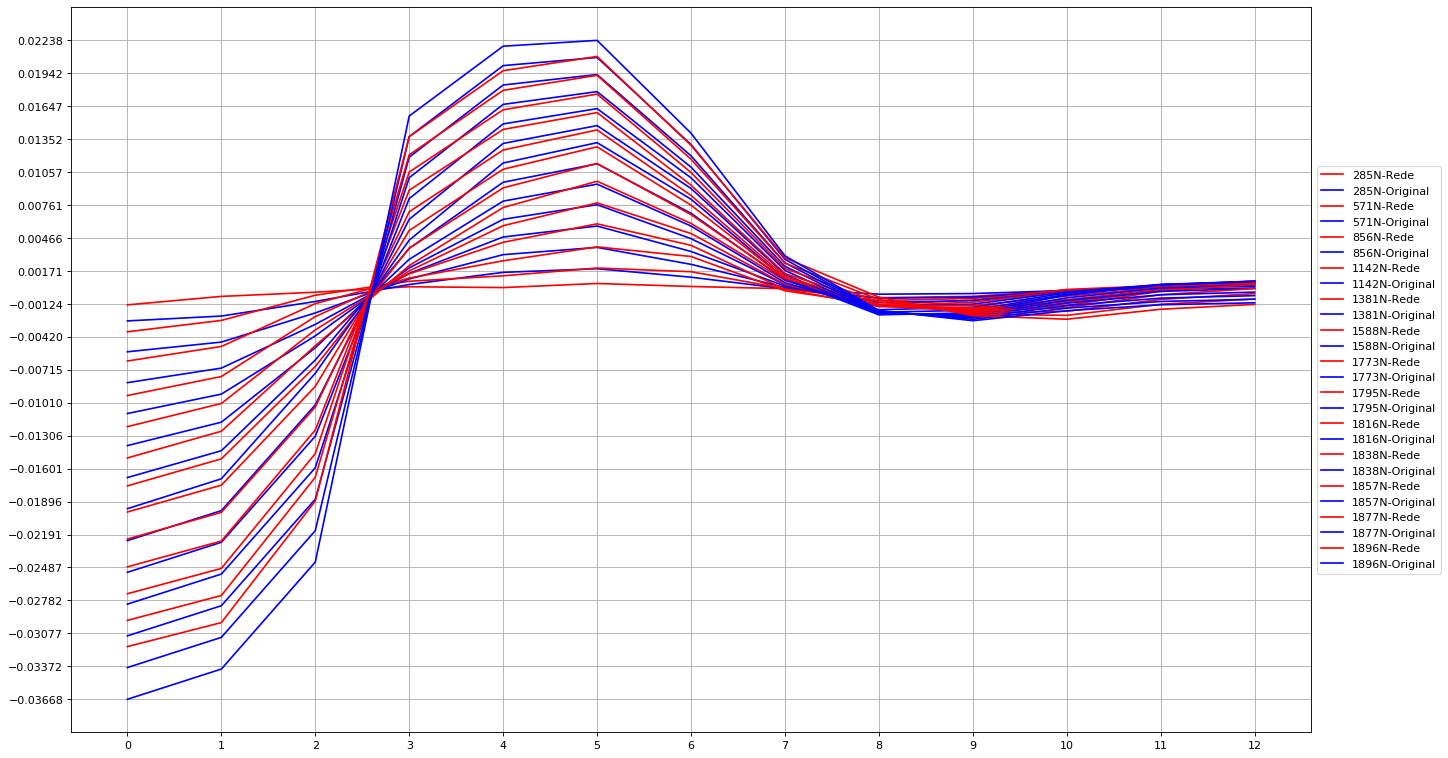

errors1
  [19.008020388040176 22.484051804870045 37.032824682410364
 23.996124440530235 31.1446437042715 23.0462078703829 20.478914138615846
 34.58937027418578 39.99964836529792 21.814017825200384 79.08488659555132
 57.963579344435715 81.89607465682678]


In [60]:
make_graph(xticks,Inc_SK_05,SK05)


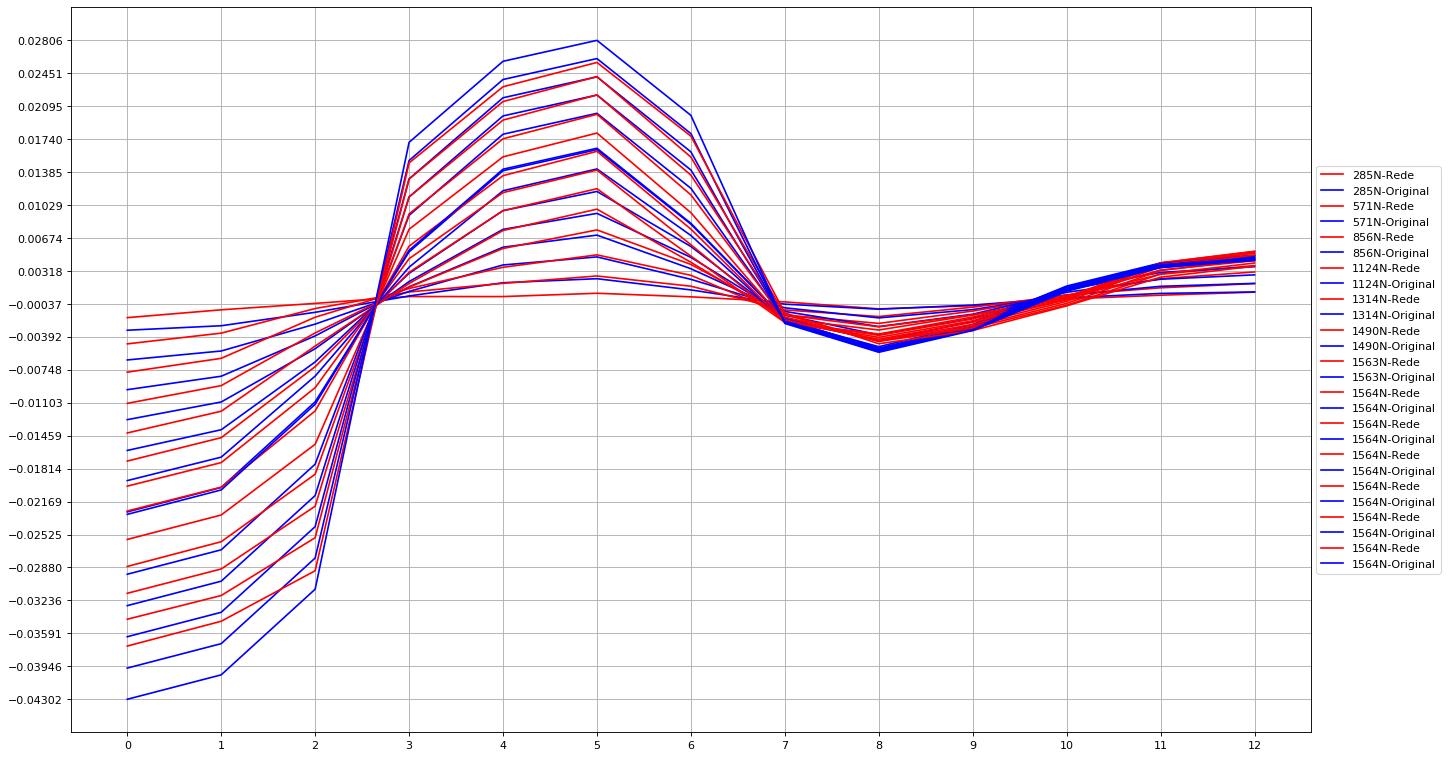

errors1
  [17.008079551941055 20.838389930193195 27.670199619018053
 17.458072478774458 26.155700158780704 20.86341230866738
 26.013135121488144 23.038580703312658 20.796193613303043
 20.77440527302175 92.17623495348985 10.380497840635014 7.060904276415021]


In [61]:
make_graph(xticks,Inc_SK_1,SK1)

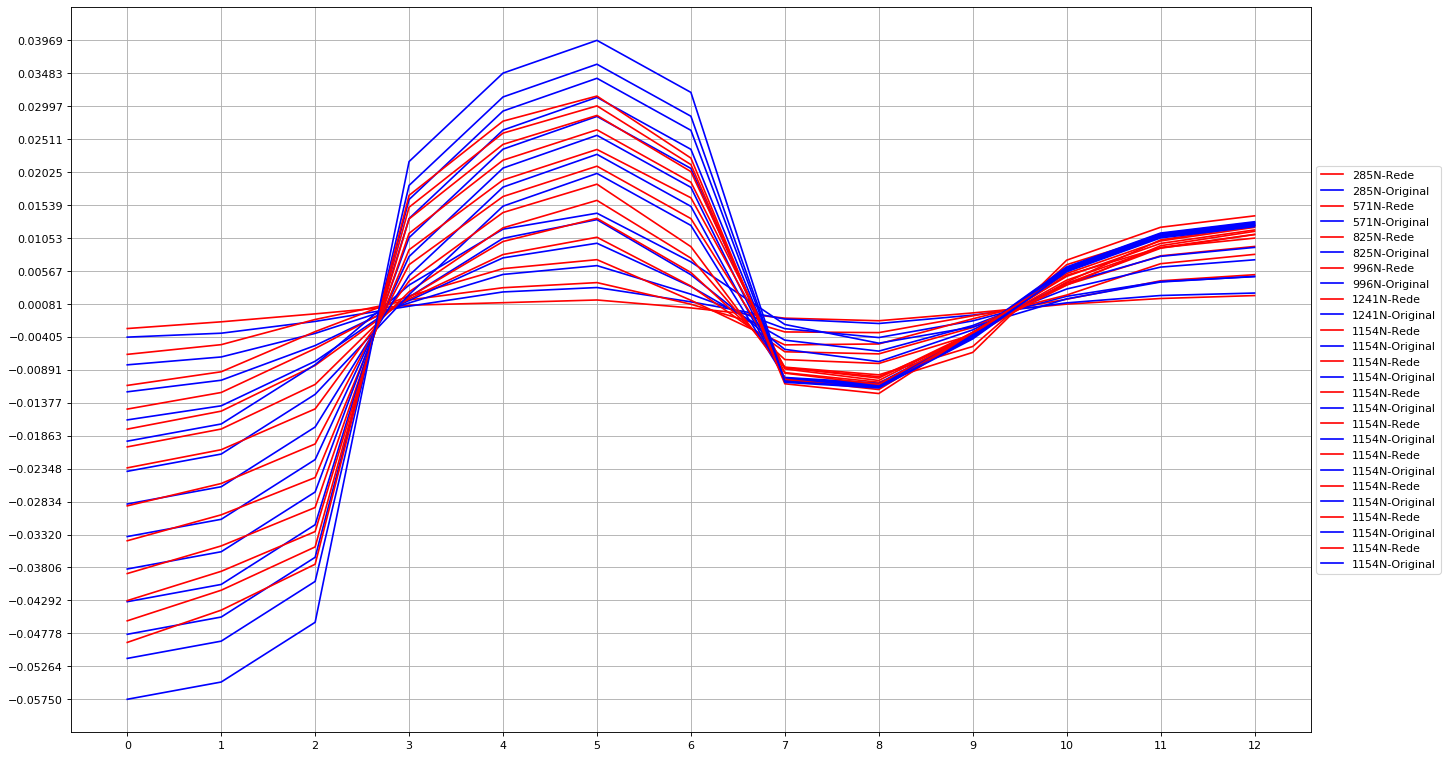

errors1
  [15.003584514757112 20.397541218967106 23.365277325580795
 27.63560754280843 25.883829032815555 24.029284008485334 40.37300348670286
 30.759575092205147 15.22055856227215 32.54122879025043 39.62534904165478
 19.735106284243123 16.774736519175043]


In [62]:
make_graph(xticks,Inc_SK_2,SK2)